<a href="https://colab.research.google.com/github/AlvineNina/Alvine_gitup_python/blob/main/CoursGratuit_Livecoding_Python_AnalyseFreshBite_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importation des packages
Nous commençons par importer les bibliothèques nécessaires :

In [4]:
!pip install pandas
!pip install matplotlib

In [5]:
import pandas as pd  # Importer la bibliothèque pandas pour la manipulation des données
import matplotlib.pyplot as plt # Importer matplotlib pour la visualisation des données

## 2. Explorer les données
Nous chargeons les données à partir d'un fichier CSV et affichons les premières lignes pour comprendre sa structure.

In [14]:
df = pd.read_csv('commandes_freshbite.csv')  # Charger les données depuis un fichier CSV dans un DataFrame pandas

df.head()  # Afficher les premières lignes du DataFrame pour comprendre sa structure

,date,region,plat,quantité,prix_unitaire
0,2023-11-24,Paris,Salade César,3,12.45
1,2023-03-13,Paris,Poke Bowl,5,10.87
2,2023-08-05,Paris,Salade César,1,12.19
3,2023-09-16,Toulouse,Salade César,5,11.99
4,2023-11-29,Toulouse,Wrap au Thon,2,14.49


## 3. Manipuler les données
Nous allons effectuer plusieurs opérations pour analyser les données :

### 3.1 Ajouter une colonne
Ajoutons une colonne `montant_total` qui calcule le chiffre d'affaires pour chaque commande.

In [15]:
df['montant_total'] = df['quantité'] * df['prix_unitaire']   # Créer une nouvelle colonne 'montant_total' en multipliant la quantité et le prix unitaire
df.head() # Afficher les premières lignes du DataFrame pour comprendre sa structure

,date,region,plat,quantité,prix_unitaire,montant_total
0,2023-11-24,Paris,Salade César,3,12.45,37.35
1,2023-03-13,Paris,Poke Bowl,5,10.87,54.35
2,2023-08-05,Paris,Salade César,1,12.19,12.19
3,2023-09-16,Toulouse,Salade César,5,11.99,59.95
4,2023-11-29,Toulouse,Wrap au Thon,2,14.49,28.98


### 3.2 Filtrer des lignes
Examinons les commandes passées un lundi pour comprendre les tendances de ce jour spécifique.

In [16]:
df['jour_semaine'] = pd.to_datetime(df['date']).dt.day_name() # Ajouter une nouvelle colonne pour extraire le jour de la semaine depuis la colonne 'date'
df #Afficher le DataFrame mis à jour

,date,region,plat,quantité,prix_unitaire,montant_total,jour_semaine
0,2023-11-24,Paris,Salade César,3,12.45,37.35,Friday
1,2023-03-13,Paris,Poke Bowl,5,10.87,54.35,Monday
2,2023-08-05,Paris,Salade César,1,12.19,12.19,Saturday
3,2023-09-16,Toulouse,Salade César,5,11.99,59.95,Saturday
4,2023-11-29,Toulouse,Wrap au Thon,2,14.49,28.98,Wednesday
...,...,...,...,...,...,...,...
995,2023-10-26,Lyon,Soupe Thaï,5,12.65,63.25,Thursday
996,2023-12-18,Marseille,Wrap au Thon,5,15.91,79.55,Monday
997,2023-04-28,Bordeaux,Wrap au Thon,2,11.09,22.18,Friday
998,2023-04-14,Toulouse,Soupe Thaï,4,18.27,73.08,Friday


In [17]:
commandes_lundi = df[df['jour_semaine'] == 'Monday'] # Filtrer les lignes où le jour de la semaine est lundi
commandes_lundi.head()

,date,region,plat,quantité,prix_unitaire,montant_total,jour_semaine
1,2023-03-13,Paris,Poke Bowl,5,10.87,54.35,Monday
8,2023-01-23,Bordeaux,Soupe Thaï,1,19.73,19.73,Monday
10,2023-11-13,Marseille,Soupe Thaï,2,17.05,34.10,Monday
20,2023-03-13,Lyon,Poke Bowl,5,15.39,76.95,Monday
25,2023-08-28,Toulouse,Burger Végétarien,5,18.61,93.05,Monday


### 3.3 Grouper les données
Calculons le chiffre d'affaires total par plat pour identifier les plus rentables.

In [27]:
chiffre_affaires_par_plat = df.groupby('plat')['montant_total'].sum().sort_values(ascending=False) # Grouper les données par 'plat' et calculer le chiffre d'affaires total pour chaque plat
chiffre_affaires_par_plat

,montant_total
plat,
Wrap au Thon,8295.56
Salade César,8272.57
Poulet Grillé,7795.76
Soupe Thaï,7559.37
Burger Végétarien,7110.55
Poke Bowl,7089.83


Calculons le chiffre d'affaires total par région pour identifier les plus rentables.


In [26]:
chiffre_affaires_par_plat = df.groupby('region')['montant_total'].sum().sort_values(ascending=False)
chiffre_affaires_par_plat.head()

,montant_total
region,
Toulouse,9916.40
Bordeaux,9472.33
Lyon,9469.55
Marseille,8662.90
Paris,8602.46


## 4. Visualiser les données
Les visualisations aident à mieux comprendre les données. Nous allons créer deux graphiques :

### 4.1 Chiffre d'affaires par plat
Un histogramme montrant les plats les plus rentables.

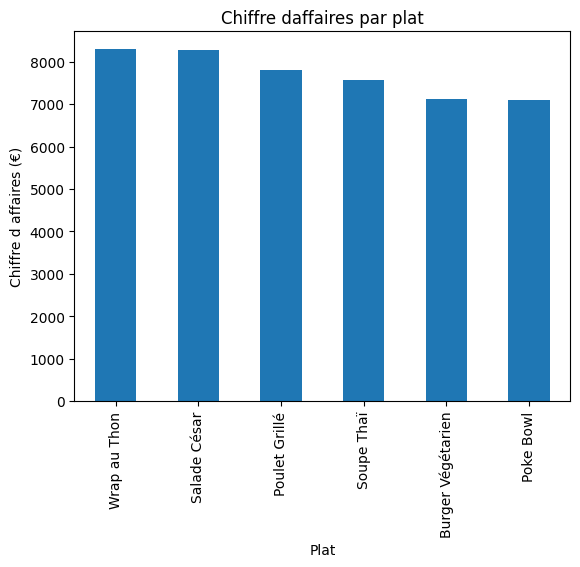

In [28]:
chiffre_affaires_par_plat.sort_values(ascending=False).plot(kind='bar', title='Chiffre daffaires par plat')  # Trier les données de chiffre d'affaires par plat dans l'ordre décroissant et créer un histogramme
plt.xlabel('Plat')
plt.ylabel('Chiffre d affaires (€)')
plt.show()

### 4.2 Commandes par jour de la semaine
Un graphique montrant le nombre de commandes pour chaque jour de la semaine.

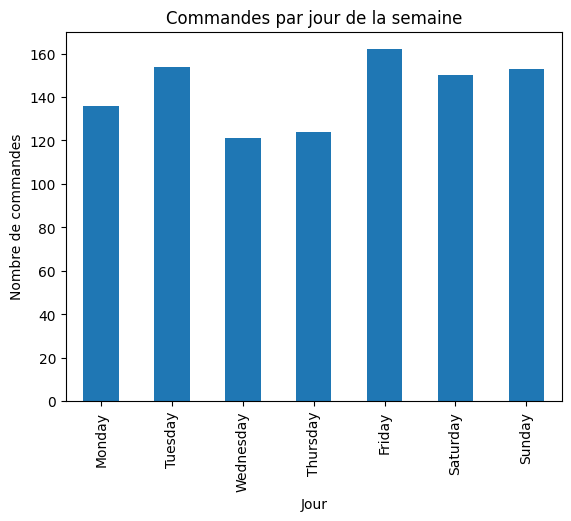

In [29]:
# Définir l'ordre des jours de la semaine
ordre_jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compter les commandes par jour de la semaine
commandes_par_jour = df.groupby('jour_semaine').size()

# Réindexer pour garantir l'ordre correct
commandes_par_jour = commandes_par_jour.reindex(ordre_jours)

# Créer le graphique
commandes_par_jour.plot(kind='bar', title='Commandes par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de commandes')
plt.show()


## 5. Automatiser
Créer du code Python permet d'automatiser nos analyses pour qu'elles soient executées de manière récurrente. Imaginions que nous soyons en 2026 et que nous souhaitons réitérer cette analyse avec notre nouveau jeu de données.

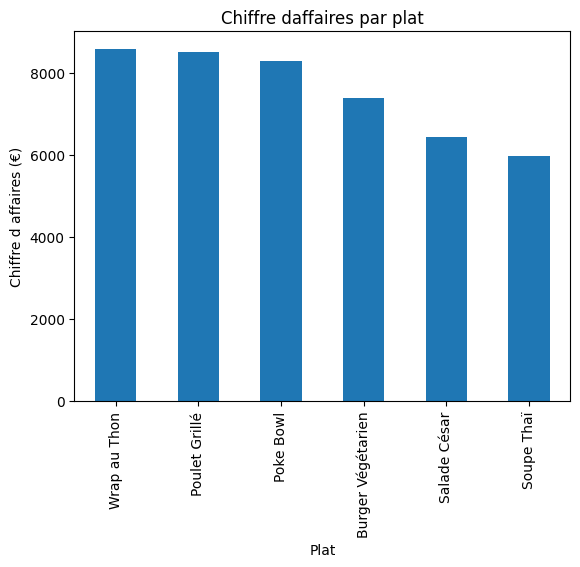

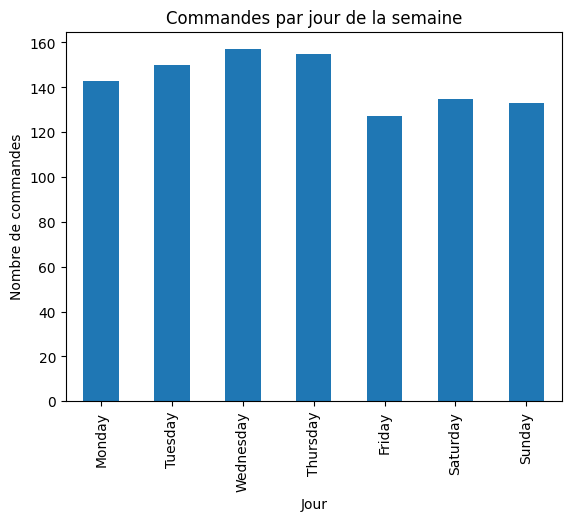

In [30]:
import pandas as pd  # Importer la bibliothèque pandas pour la manipulation des données
import matplotlib.pyplot as plt # Importer matplotlib pour la visualisation des données

df = pd.read_csv('commandes_freshbite_2025.csv')  # Charger les données depuis un fichier CSV dans un DataFrame pandas

df.head()  # Afficher les premières lignes du DataFrame pour comprendre sa structure

df['montant_total'] = df['quantité'] * df['prix_unitaire']   # Créer une nouvelle colonne 'montant_total' en multipliant la quantité et le prix unitaire
df.head()   # Afficher les premières lignes du DataFrame pour comprendre sa structure
df['montant_total'] = df['quantité'] * df['prix_unitaire']   # Créer une nouvelle colonne 'montant_total' en multipliant la quantité et le prix unitaire
df.head()   # Afficher les premières lignes du DataFrame pour comprendre sa structure
df['jour_semaine'] = pd.to_datetime(df['date']).dt.day_name() # Ajouter une nouvelle colonne pour extraire le jour de la semaine depuis la colonne 'date'
df #Afficher le DataFrame mis à jour
commandes_lundi = df[df['jour_semaine'] == 'Monday'] # Filtrer les lignes où le jour de la semaine est lundi
commandes_lundi.head()
chiffre_affaires_par_plat = df.groupby('plat')['montant_total'].sum() # Grouper les données par 'plat' et calculer le chiffre d'affaires total pour chaque plat
chiffre_affaires_par_plat
chiffre_affaires_par_plat.sort_values(ascending=False).plot(kind='bar', title='Chiffre daffaires par plat')  # Trier les données de chiffre d'affaires par plat dans l'ordre décroissant et créer un histogramme
plt.xlabel('Plat')
plt.ylabel('Chiffre d affaires (€)')
plt.show()

# Définir l'ordre des jours de la semaine
ordre_jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compter les commandes par jour de la semaine
commandes_par_jour = df.groupby('jour_semaine').size()

# Réindexer pour garantir l'ordre correct
commandes_par_jour = commandes_par_jour.reindex(ordre_jours)

# Créer le graphique
commandes_par_jour.plot(kind='bar', title='Commandes par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de commandes')
plt.show()